## Exploratory Data Analysis 

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [ ]:
# Helper code

# Create line graph
plt.plot(x, y)
plt.show()

# Create a scatter plot
plt.scatter(x, y)
plt.show()

# Create a histogram
plt.hist(x, bins=10)
plt.show()

# Create a bar plot
plt.bar(x, names=x_names)
plt.show()

In [3]:
# Load the dataset
ab_df = pd.read_csv("/content/sample_data/AB_NYC_2019.csv")
ab_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Warm up tasks

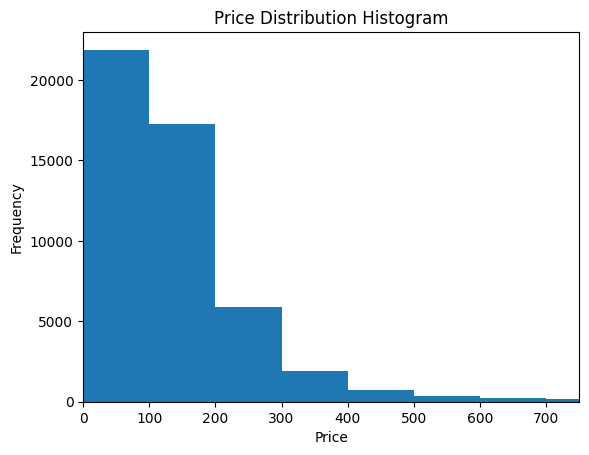

In [30]:
# Histogram of price
plt.hist(ab_df['price'], bins = 100)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution Histogram')
plt.xlim(0,750)
plt.show()

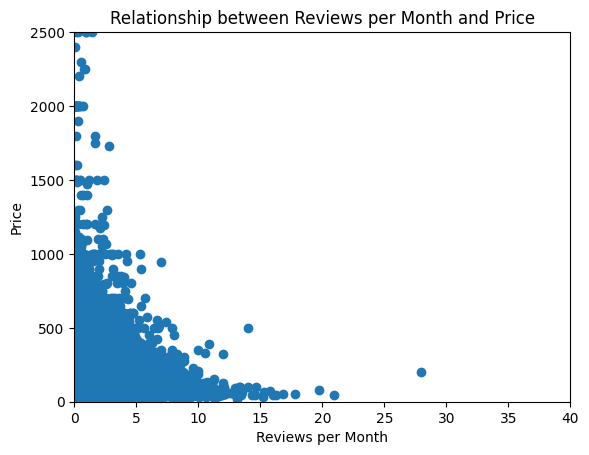

In [22]:
# Relationship between reviews per month and price
plt.scatter(ab_df['reviews_per_month'],ab_df['price'])
plt.xlabel('Reviews per Month')
plt.ylabel('Price')
plt.title('Relationship between Reviews per Month and Price')
plt.xlim(0,40)
plt.ylim(0, 2500)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

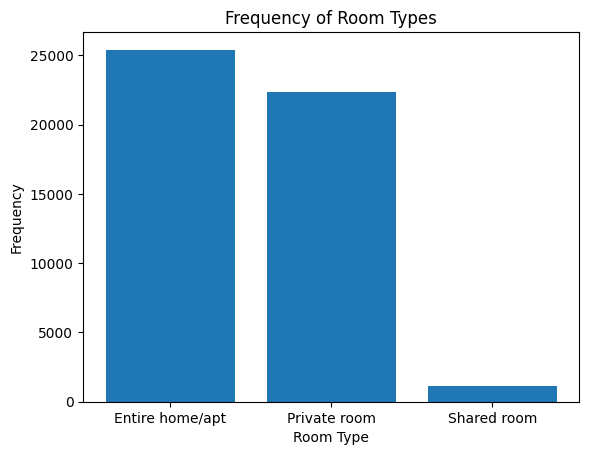

In [28]:
# Bar plot of the room type
room_type_counts = ab_df['room_type'].value_counts()
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.title('Frequency of Room Types')
plt.bar(room_type_counts.index, room_type_counts.values)
plt.show

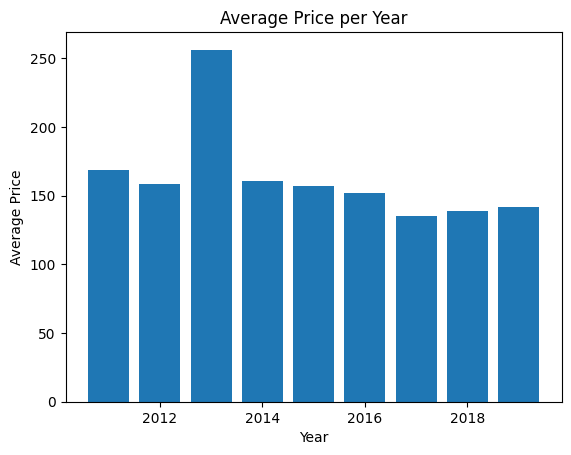

In [29]:
# Bar plot for the average price for each year
ab_df['date'] = pd.to_datetime(ab_df['last_review'])
ab_df['year'] = ab_df['date'].dt.year
avg_price_per_year = ab_df.groupby('year')['price'].mean()

plt.bar(avg_price_per_year.index, avg_price_per_year.values)

plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price per Year')

plt.show()

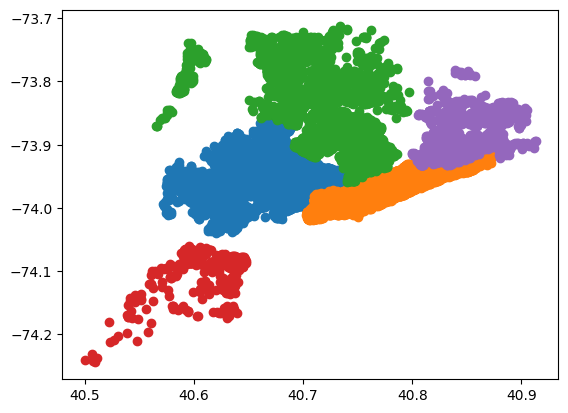

In [34]:
# Create a scatter plot of locations of listings using geo coordinates color coded by neighbourhood group
ab_df["neighbourhood_group"].unique()
for n_group in ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']:
  sub_ab_df = ab_df[ab_df["neighbourhood_group"] == n_group]
  plt.scatter(sub_ab_df['latitude'], sub_ab_df['longitude'])
plt.show()

### Exploration questions

<BarContainer object of 3 artists>

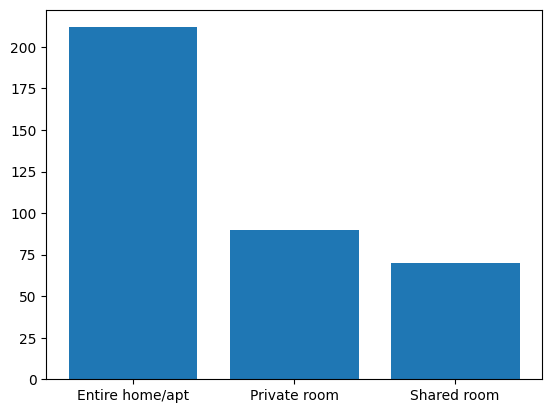

In [35]:
# How does the average price differ between various room types?
avg_price_per_room_type = ab_df.groupby('room_type')['price'].mean()
plt.bar(avg_price_per_room_type.index, avg_price_per_room_type.values)

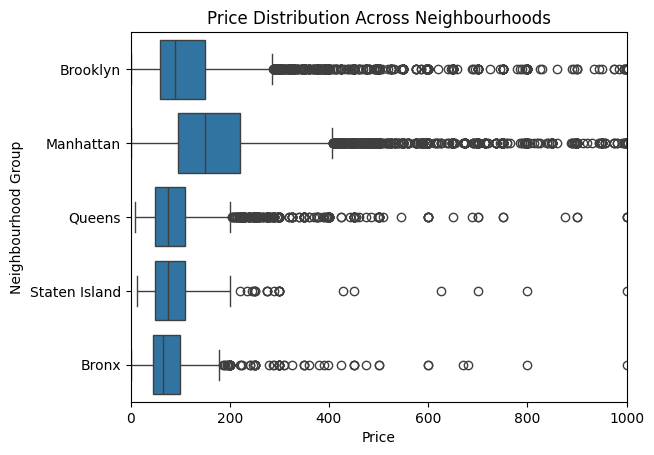

In [54]:
# Distribution of rental prices across different neighborhoods?
import seaborn as sns
sns.boxplot(x='price', y='neighbourhood_group', data=ab_df)

# Add labels and title
plt.ylabel('Neighbourhood Group')
plt.xlabel('Price')
plt.title('Price Distribution Across Neighbourhoods')
plt.xlim(0,1000)


plt.show()


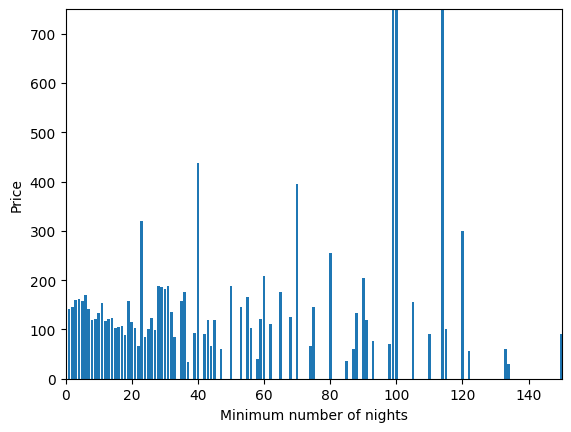

In [43]:
# Minimum number of nights required impact the price of listings?
avg_price_by_nights = ab_df.groupby('minimum_nights')['price'].mean()
plt.bar(avg_price_by_nights.index, avg_price_by_nights.values)
plt.xlabel('Minimum number of nights')
plt.ylabel('Price')
plt.ylim(0,750)
plt.xlim(0,150)

plt.show()

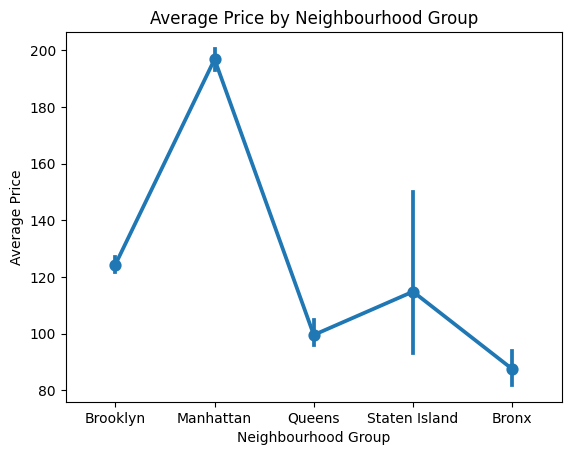

In [55]:
# Geographic distribution of listings correlate with prices?
sns.pointplot(x='neighbourhood_group', y='price', data=ab_df)

plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.title('Average Price by Neighbourhood Group')

plt.show()

In [57]:
ab_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,date,year
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,38843,38843.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,2018-10-04 01:47:23.910099456,2018.287722
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,2011-03-28 00:00:00,2011.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,2018-07-08 00:00:00,2018.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,2019-05-19 00:00:00,2019.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,2019-06-23 00:00:00,2019.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,2019-07-08 00:00:00,2019.000000
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,NaN,1.181165


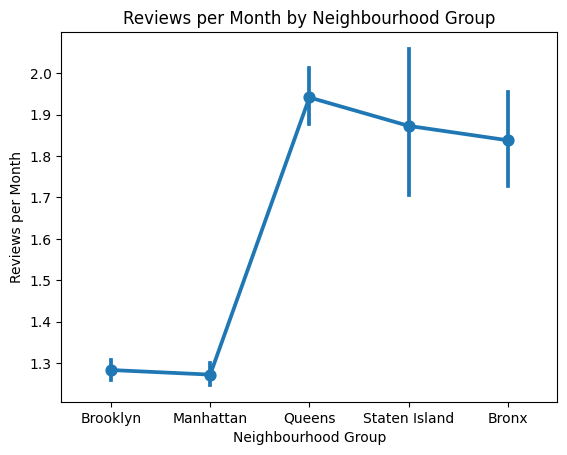

In [59]:
sns.pointplot(x='neighbourhood_group', y='reviews_per_month', data=ab_df)

plt.xlabel('Neighbourhood Group')
plt.ylabel('Reviews per Month')
plt.title('Reviews per Month by Neighbourhood Group')

plt.show()